In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Load dataset
df = pd.read_csv("Iris.csv")
df.drop("Id", axis=1, inplace=True)

In [5]:
# Encode class labels
le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])  # 0=setosa, 1=versicolor, 2=virginica

In [7]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
# Features and target
X = df.drop("Species", axis=1)
y = df["Species"]


In [11]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [15]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3)
}

results = []

In [17]:
# Train, predict, evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_scaled, y, cv=5)
    avg_cv = np.mean(cv_scores)

    print(f"\nModel: {name}")
    print("Accuracy on Test Set:", round(acc, 2))
    print("Cross-validation Accuracy:", round(avg_cv, 2))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

    results.append({
        "Model": name,
        "Test Accuracy": acc,
        "CV Accuracy": avg_cv
    })



Model: Logistic Regression
Accuracy on Test Set: 1.0
Cross-validation Accuracy: 0.96
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Model: Decision Tree
Accuracy on Test Set: 1.0
Cross-validation Accuracy: 0.96
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           

In [19]:
# Show summary
summary = pd.DataFrame(results).sort_values(by="CV Accuracy", ascending=False)
print("\nSummary of Model Performance:")
print(summary)


Summary of Model Performance:
                 Model  Test Accuracy  CV Accuracy
0  Logistic Regression            1.0     0.960000
1        Decision Tree            1.0     0.960000
2  K-Nearest Neighbors            1.0     0.953333


In [21]:
# Optional: Plot heatmap for confusion matrix of best model
best_model_name = summary.iloc[0]["Model"]
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

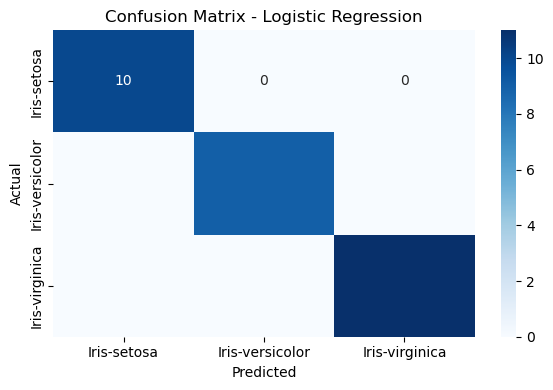

In [23]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()